Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [ ]:
df = pd.read_csv("./datasets/lab_1.csv")

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


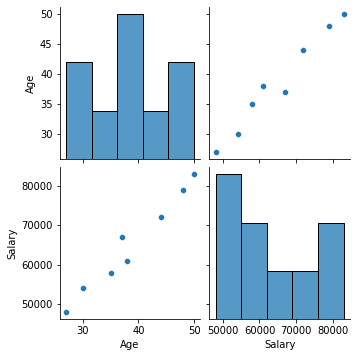

In [ ]:
sns.pairplot(df)

In [ ]:
med_age = df['Age'].median()
df['Age'].fillna(med_age,inplace=True)

In [ ]:
mean_sal_germany = df[df['Country']=='Germany']['Salary'].mean()
df['Salary'].fillna(mean_sal_germany,inplace=True)

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,68500.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Converting categorical features

In [ ]:
t = pd.get_dummies(df,drop_first=True)
df = t

In [ ]:
df

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,0,0,0
1,27.0,48000.0,0,1,1
2,30.0,54000.0,1,0,0
3,38.0,61000.0,0,1,0
4,40.0,68500.0,1,0,1
5,35.0,58000.0,0,0,1
6,38.0,52000.0,0,1,0
7,48.0,79000.0,0,0,1
8,50.0,83000.0,1,0,0
9,37.0,67000.0,0,0,1


In [ ]:
X = df.drop('Purchased_Yes',axis=1)
y = df['Purchased_Yes']

train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
scale = scaler.transform(X_train)

In [ ]:
scaled_X = pd.DataFrame(scale,columns=X.columns)

In [ ]:
X_train = scaled_X

Use Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test)

Validate

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[0 1]
 [0 2]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\hirem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hirem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hirem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde